Adapted from: https://github.com/pymc-devs/pymc3/blob/master/pymc3/examples/logistic.py

In [1]:
%pylab --no-import-all inline

from pymc3 import *
import theano.tensor as T
from numpy import random, sum as nsum, ones, concatenate, newaxis, dot, arange
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def numpy_invlogit(x):
    return 1 / (1 + np.exp(-x))

In [3]:
# Deprecated now!

# def tinvlogit(x):
#     lower = 1e-6
#     upper = 1 - 1e-6
#     return lower + (upper - lower) * 1 / (1 + T.exp(-x))

Basic Logistic Regression
===

In [4]:
# Set up basic parameters
num_features = 10
n = 1000

In [5]:
# Choose random values for the actual alpha and betas
alpha_a = random.normal(size=1)

betas_a = random.normal(size = num_features)

# Create fake predictor data
X_train = random.normal(size=(n, num_features))
X_test =  random.normal(size=(n, num_features))

In [6]:
# Calculate the outcomes
Y_train = random.binomial(1, numpy_invlogit(alpha_a + np.sum(betas_a[None, :] * X_train, 1)))
Y_test = random.binomial(1, numpy_invlogit(alpha_a + np.sum(betas_a[None, :] * X_test, 1)))

In [7]:
model_input = theano.shared(X_train)
model_output = theano.shared(Y_train)

In [8]:
training_model = Model()

with training_model:
    alpha = Normal(b'alpha', mu=0, tau=2.**-2, shape=(1))
    betas = Normal(b'betas', mu=0, tau=2. ** -2, shape=(1, num_features))
    
    #p = invlogit(alpha+T.dot(predictors, betas))
    p = invlogit(alpha + sum(betas*model_input, 1))

    o = Bernoulli(b'o', p, observed=model_output)

In [9]:
type(model_input)

theano.tensor.sharedvar.TensorSharedVariable

In [10]:
with training_model:
    v_params = variational.advi(n=10000)

Iteration 0 [0%]: ELBO = -2101.22
Iteration 1000 [10%]: Average ELBO = -1283.49
Iteration 2000 [20%]: Average ELBO = -939.11
Iteration 3000 [30%]: Average ELBO = -696.37
Iteration 4000 [40%]: Average ELBO = -542.68
Iteration 5000 [50%]: Average ELBO = -440.08
Iteration 6000 [60%]: Average ELBO = -382.9
Iteration 7000 [70%]: Average ELBO = -347.42
Iteration 8000 [80%]: Average ELBO = -326.39
Iteration 9000 [90%]: Average ELBO = -312.91
Finished [100%]: Average ELBO = -305.86


In [11]:
v_params

ADVIFit(means={'alpha': array([-1.71932788]), 'betas': array([[-1.43231306,  1.02677773,  0.07306212, -0.33712243, -1.25029105,
         1.09957023, -0.99134692, -0.3321278 ,  1.66080176, -1.67061528]])}, stds={'alpha': array([ 0.18878049]), 'betas': array([[ 0.18269011,  0.16914995,  0.15843349,  0.1578002 ,  0.17152114,
         0.1731561 ,  0.16514875,  0.15556695,  0.18979269,  0.19043028]])}, elbo_vals=array([-2101.21755898, -1117.16126477, -1418.44019796, ...,  -295.46180437,
        -308.58826953,  -302.88219339]))

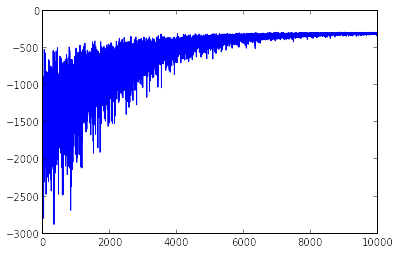

In [12]:
plt.plot(v_params.elbo_vals)

In [13]:
with training_model:
    advi_trace = variational.sample_vp(v_params, draws=5000)

In [14]:
with training_model:
    # move the chain to the MAP which should be a good starting point
    #start = find_MAP()
    #step = NUTS()

    #trace = sample(3e3, step, start)
    
    step = NUTS(scaling=v_params.stds)

    nuts_trace = sample(8e3, step, start=v_params.means)


/home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_64-2.7.3-64/tmp16urQ1/mod.cpp: In member function 'int {anonymous}::__struct_compiled_op_72461b6bd4c3dc011e7be130351c31f3::run()':
/home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_64-2.7.3-64/tmp16urQ1/mod.cpp:1297:17: warning: format '%i' expects argument of type 'int', but argument 5 has type 'npy_intp {aka long int}' [-Wformat]
/home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_64-2.7.3-64/tmp16urQ1/mod.cpp:1297:17: warning: format '%i' expects argument of type 'int', but argument 8 has type 'npy_intp {aka long int}' [-Wformat]
/home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_64-2.7.3-64/tmp16urQ1/mod.cpp:1317:17: warning: format '%i' expects argument of type 'int', but argument 5 has type 'npy_intp {aka long int}' [-Wformat]
/home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_

00001	#include <Python.h>
00002	#include <iostream>
00003	#include "theano_mod_helper.h"
00004	#include <math.h>
00005	#include <numpy/arrayobject.h>
00006	#include <numpy/arrayscalars.h>
00007	#include <vector>
00008	#include <algorithm>
00009	//////////////////////
00010	////  Support Code
00011	//////////////////////
00012	
00013	
00014	    namespace {
00015	    struct __struct_compiled_op_72461b6bd4c3dc011e7be130351c31f3 {
00016	        PyObject* __ERROR;
00017	
00018	        PyObject* storage_V3;
00019	PyObject* storage_V5;
00020	PyObject* storage_V7;
00021	PyObject* storage_V9;
00022	PyObject* storage_V11;
00023	PyObject* storage_V13;
00024	PyObject* storage_V15;
00025	PyObject* storage_V17;
00026	PyObject* storage_V19;
00027	PyObject* storage_V21;
00028	PyObject* storage_V1;
00029	        
00030	
00031	        __struct_compiled_op_72461b6bd4c3dc011e7be130351c31f3() {
00032	            // This is only somewhat safe because we:
00033	            //  1) Are not a virtual class
0003

Exception: ('The following error happened while compiling the node', Elemwise{Composite{Switch((i0 * i1 * GE(Composite{(i0 + (scalar_sigmoid(i1) * i2))}(i2, (i3 + i4), i5), i6) * LE(Composite{(i0 + (scalar_sigmoid(i1) * i2))}(i2, (i3 + i4), i5), i7)), Switch(i8, log(Composite{(i0 + (scalar_sigmoid(i1) * i2))}(i2, (i3 + i4), i5)), (-scalar_softplus((i3 + i4)))), i9)}}[(0, 4)](Elemwise{ge,no_inplace}.0, Elemwise{le,no_inplace}.0, TensorConstant{(1,) of 2...604925e-16}, Reshape{1}.0, Sum{axis=[1], acc_dtype=float64}.0, TensorConstant{(1,) of 1.0}, TensorConstant{(1,) of 0}, TensorConstant{(1,) of 1}, <TensorType(int64, vector)>, TensorConstant{(1,) of -inf}), '\n', "Compilation failed (return status=1): /home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_64-2.7.3-64/tmp16urQ1/mod.cpp: In member function 'int {anonymous}::__struct_compiled_op_72461b6bd4c3dc011e7be130351c31f3::run()':. /home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_64-2.7.3-64/tmp16urQ1/mod.cpp:1297:17: warning: format '%i' expects argument of type 'int', but argument 5 has type 'npy_intp {aka long int}' [-Wformat]. /home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_64-2.7.3-64/tmp16urQ1/mod.cpp:1297:17: warning: format '%i' expects argument of type 'int', but argument 8 has type 'npy_intp {aka long int}' [-Wformat]. /home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_64-2.7.3-64/tmp16urQ1/mod.cpp:1317:17: warning: format '%i' expects argument of type 'int', but argument 5 has type 'npy_intp {aka long int}' [-Wformat]. /home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_64-2.7.3-64/tmp16urQ1/mod.cpp:1317:17: warning: format '%i' expects argument of type 'int', but argument 8 has type 'npy_intp {aka long int}' [-Wformat]. /home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_64-2.7.3-64/tmp16urQ1/mod.cpp:1337:17: warning: format '%i' expects argument of type 'int', but argument 5 has type 'npy_intp {aka long int}' [-Wformat]. /home/nicole/.theano/compiledir_Linux-3.8.11-x86_64-with-Ubuntu-12.04-precise-x86_64-2.7.3-64/tmp16urQ1/mod.cpp:1337:17: warning: format '%i' expects argument of type 'int', but argument 8 has type 'npy_intp {aka long int}' [-Wformat]. /tmp/cctKKnS3.s: Assembler messages:. /tmp/cctKKnS3.s:4443: Error: no such instruction: `vfmadd312sd (%r11),%xmm0,%xmm1'. /tmp/cctKKnS3.s:4801: Error: no such instruction: `vfmadd312sd (%r11),%xmm0,%xmm1'. ", '[Elemwise{Composite{Switch((i0 * i1 * GE(Composite{(i0 + (scalar_sigmoid(i1) * i2))}(i2, (i3 + i4), i5), i6) * LE(Composite{(i0 + (scalar_sigmoid(i1) * i2))}(i2, (i3 + i4), i5), i7)), Switch(i8, log(Composite{(i0 + (scalar_sigmoid(i1) * i2))}(i2, (i3 + i4), i5)), (-scalar_softplus((i3 + i4)))), i9)}}[(0, 4)](<TensorType(int8, vector)>, <TensorType(int8, vector)>, TensorConstant{(1,) of 2...604925e-16}, <TensorType(float64, (True,))>, <TensorType(float64, vector)>, TensorConstant{(1,) of 1.0}, TensorConstant{(1,) of 0}, TensorConstant{(1,) of 1}, <TensorType(int64, vector)>, TensorConstant{(1,) of -inf})]')

In [ ]:
traceplot(nuts_trace[1000:])

In [ ]:
summary(nuts_trace[1000:])

In [ ]:
alpha_a

In [ ]:
betas_a

In [ ]:
# Replace shared variables with testing set
model_input.set_value(X_test)
model_output.set_value(Y_test)

In [ ]:
# Create posterior predictive samples
ppc = sample_ppc(advi_trace, model=training_model, samples=1000)

# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['o'].mean(axis=0) > 0.5

In [ ]:
print('ADVI Accuracy = {}%'.format((Y_test == pred).mean() * 100))

In [ ]:
# Create posterior predictive samples
ppc = sample_ppc(nuts_trace[1000:], model=training_model, samples=1000)

# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['o'].mean(axis=0) > 0.5

In [ ]:
print('NUTS Accuracy = {}%'.format((Y_test == pred).mean() * 100))

API-ify a Model
===

In [ ]:
API_test =  random.normal(size=(1, num_features))

In [ ]:
API_Y_test = random.binomial(1, numpy_invlogit(alpha_a + np.sum(betas_a[None, :] * API_test, 1)))

In [ ]:
API_Y_test

In [ ]:
# Put in some fake data
API_fake_Y = 0

In [ ]:
model_input = theano.shared(API_test)

In [ ]:
API_model = Model()

with API_model:
    alpha = Normal(b'alpha', mu=0, tau=2.**-2, shape=(1))
    betas = Normal(b'betas', mu=0, tau=2. ** -2, shape=(1, num_features))
    
    #p = invlogit(alpha+T.dot(predictors, betas))
    p = invlogit(alpha + sum(betas*model_input, 1))

    #o = Bernoulli(b'o', p, shape=(1, 2))
    o = Bernoulli(b'o', p, observed=API_fake_Y)

In [ ]:
# Create posterior predictive samples
ppc = sample_ppc(advi_trace, model=API_model, samples=1000)

In [ ]:
# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['o'].mean(axis=0) > 0.5

In [ ]:
pred

Hierachical Logistic Regression
===

In [ ]:
# Set up basic parameters
num_markets = 4

# Need lots of data to converge
num_per_market = 15000
num_observed = num_per_market * num_markets
num_features = 100

In [ ]:
# Set up markets
market = concatenate([[i] * num_per_market for i in range(num_markets)])

In [ ]:
market

In [ ]:
# Simulate the features
predictors = np.random.normal(size=(num_observed, num_features))

In [ ]:
alpha_a = np.random.normal(size=(num_markets))
beta_a = np.random.normal(size=(num_markets, num_features))

In [ ]:
# Calculate the actual data
p = alpha_a[market] + nsum(beta_a[market] * predictors, 1)

#p = nsum(beta_a[market] * predictors, 1)

In [ ]:
# Calculate the outcomes
outcomes = np.random.binomial(1, numpy_invlogit(p))

In [ ]:
model = Model()

with model:
    # Both alpha and beta are drawn for the same distributions
    mu_alpha = Normal(b"mu_alpha", 0, 100, shape=(1))
    sigma_alpha = Uniform(b"sigma_alpha", .0, 10, testval=2.)
    
    mu_beta = Normal(b"mu_beta", 0, 100, shape=(1))
    sigma_beta = Uniform(b"sigma_beta", 0, 10, testval=2.)
    
    alpha = Normal(b'alpha', mu=mu_alpha, tau=sigma_alpha, shape=(num_markets))
    beta = Normal(b'beta', mu=mu_beta, tau=sigma_beta, shape=(num_markets, num_features))
    
    m = T.constant(market)
#     print(alpha.random().shape)
#     print(beta.random().shape)
    p = tinvlogit(alpha[m] + sum(beta[m]*predictors, 1))
    #p = tinvlogit(alpha[m] + T.dot(predictors, beta[m, :]))
    #p = tinvlogit(sum(beta[m] * predictors, 1))
    
    o = Bernoulli(b'o', p, observed=outcomes)

In [ ]:
with model:
    v_params = variational.advi(n=10000)

In [ ]:
plt.plot(v_params.elbo_vals)

In [ ]:
mu

In [ ]:
sds

In [ ]:
with model:
    # move the chain to the MAP which should be a good starting point
    #start = find_MAP()
    #step = NUTS(scaling=start)
    #step = Slice()
#     step = NUTS()
#     trace = sample(3e4, step)
    
    step = NUTS(scaling=v_params.stds)
    trace = sample(20000, step, start=v_params.means)


In [ ]:
traceplot(trace)

In [ ]:
summary(trace)

In [ ]:
beta_a

In [ ]:
alpha_a

In [ ]:
mu['alpha']

In [ ]:
mu['beta']

In [ ]:
forestplot(trace, varnames=['mu_alpha', 'mu_beta', 'alpha', 'sigma_alpha', 'sigma_beta'])